# Classification on Mutag dataset

In [1]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [2]:
path='./mutag/'

In [3]:
dataset=list(build_mutag_dataset(path))

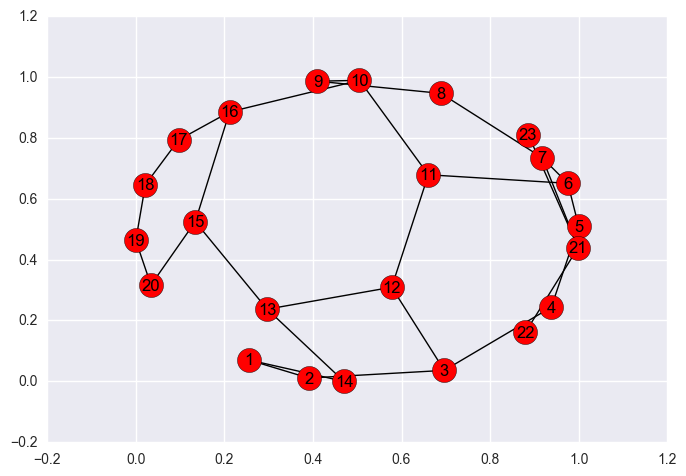

In [4]:
dataset[0][0].display_graph()

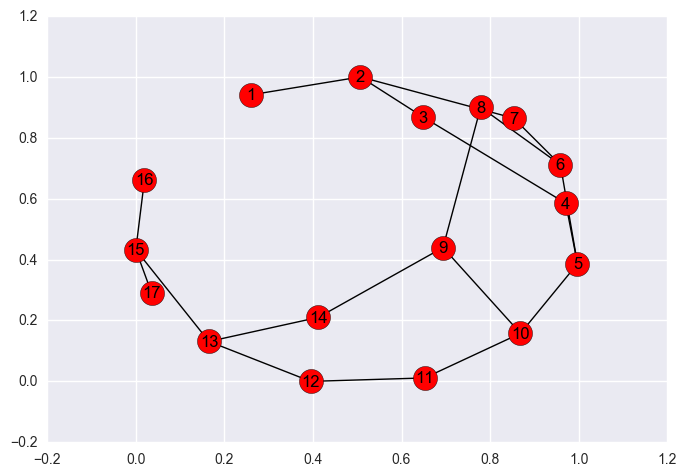

In [5]:
dataset[1][0].display_graph()

# Classification via EMD

In [6]:
emd_clf=NN.Graph_EMD_1NN_Classifier(features_metric='dirac')

### Est-ce que les distances entre les points sont discriminantes ?

In [7]:
X,y=zip(*dataset)

In [8]:
y_sort,X_sort=zip(*sorted(zip(y, X), key=lambda tup: tup[0]))

In [9]:
emd_clf.fit(np.array(X_sort),np.array(y_sort))

Graph_EMD_1NN_Classifier(features_metric='dirac', parallel=False,
             similarity_measure=<function emd_graph_distance.<locals>.dist at 0x1107d19d8>,
             the_lower_the_better=True)

In [10]:
preds=emd_clf.predict(np.array(X_sort))

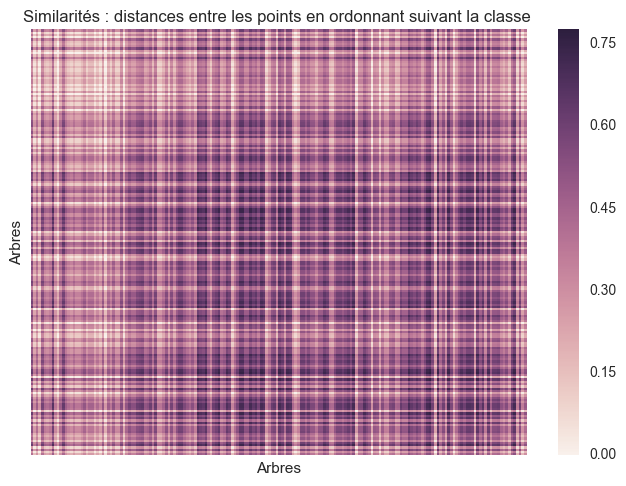

In [11]:
sns.heatmap(emd_clf.similarities,xticklabels=False,yticklabels=False)
plt.title('Similarités : distances entre les points en ordonnant suivant la classe ')
plt.xlabel('Arbres')
plt.ylabel('Arbres')
plt.show()

On n'a pas vraiment de logique la classif risque d'être très mauvaise.

### Sur un train/test

In [31]:
A,B=split_train_test(dataset,0.8)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [34]:
emd_clf.fit(np.array(x_train),np.array(y_train))

Graph_EMD_1NN_Classifier(features_metric='dirac', parallel=False,
             similarity_measure=<function emd_graph_distance.<locals>.dist at 0x1104e5730>,
             the_lower_the_better=True)

In [35]:
preds=emd_clf.predict(np.array(x_test))

In [36]:
np.sum(preds == np.array(y_test)) / len(np.array(y_test))

0.42105263157894735

Effectivement Jamy

# Classification via GW

### Sans normalisation

In [51]:
A,B=split_train_test(dataset,0.8)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [52]:
gw_clf=NN.Graph_GW_1NN_Classifier(10,method='shortest_path',normalize_distance=False)

In [53]:
gw_clf.compute_similarity(x_train[0],x_train[1])

9.5659986874462142

In [54]:
gw_clf.fit(x_train,y_train)

In [55]:
preds,S=gw_clf.predict(x_test)

In [56]:
np.sum(preds == np.array(y_test)) / len(np.array(y_test))

0.63157894736842102

C'est déjà mieux

### En normalisant

In [77]:
gw_clf=NN.Graph_GW_1NN_Classifier(10,method='shortest_path',normalize_distance=True)

In [78]:
gw_clf.compute_similarity(x_train[0],x_train[1])

3.4419875617590199

In [79]:
gw_clf.compute_similarity(x_train[0],x_train[0])

0

In [29]:
gw_clf.fit(x_train,y_train)

Les distances entre pour chaque point et eux mêmes sont calculées


In [30]:
preds,S=gw_clf.predict(x_test)

In [31]:
np.sum(preds == np.array(y_test)) / len(np.array(y_test))

0.78947368421052633

In [81]:
X,y=zip(*dataset)
y_sort,X_sort=zip(*sorted(zip(y, X), key=lambda tup: tup[0]))
gw_clf.fit(np.array(X_sort),np.array(y_sort))

Les distances entre pour chaque point et eux mêmes sont calculées


In [82]:
preds=gw_clf.predict(np.array(X_sort))

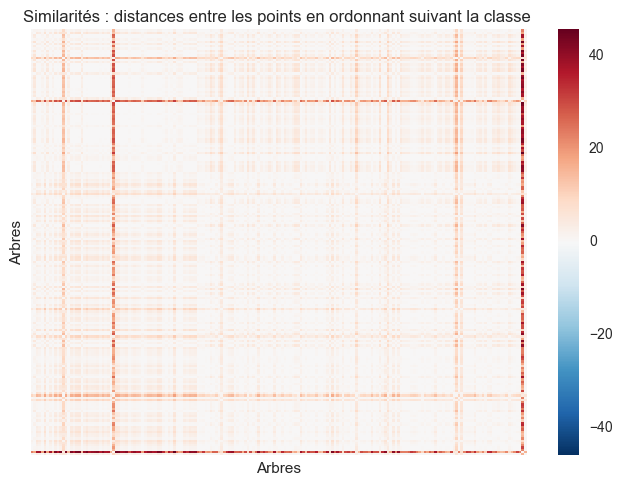

In [83]:
sns.heatmap(gw_clf.similarities,xticklabels=False,yticklabels=False)
plt.title('Similarités : distances entre les points en ordonnant suivant la classe ')
plt.xlabel('Arbres')
plt.ylabel('Arbres')
plt.show()

C'est encore beaucoup mieux

# Classification via WGW

### Sans normalisation

In [57]:
A,B=split_train_test(dataset,0.8)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [58]:
wgw_clf=NN.Graph_WGW_1NN_Classifier(5,25,method='shortest_path',features_metric='dirac',normalize_distance=False)

In [59]:
wgw_clf.compute_similarity(x_train[0],x_train[1])

34.242398273375329

In [60]:
wgw_clf.compute_similarity(x_train[0],x_train[0])

31.689442912970975

In [61]:
wgw_clf.fit(np.array(x_train),np.array(y_train))

In [62]:
preds=wgw_clf.predict(np.array(x_test))

In [63]:
np.sum(preds == np.array(y_test)) / len(np.array(y_test))

0.68421052631578949

## En normalisant

In [64]:
A,B=split_train_test(dataset,0.8)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [71]:
wgw_clf=NN.Graph_WGW_1NN_Classifier(10,25,method='shortest_path',features_metric='dirac',normalize_distance=True)

In [72]:
wgw_clf.compute_similarity(x_train[0],x_train[1])

47.926934201682336

In [73]:
wgw_clf.compute_similarity(x_train[0],x_train[0])

0

In [74]:
wgw_clf.fit(np.array(x_train),np.array(y_train))

Les distances entre pour chaque point et eux mêmes sont calculées


In [75]:
preds,S=wgw_clf.predict(np.array(x_test))

In [76]:
np.sum(preds == np.array(y_test)) / len(np.array(y_test))

0.52631578947368418

# GridSearch

In [3]:
dataset=list(build_mutag_dataset(path))
X,y=zip(*dataset)

In [4]:
A,B=split_train_test(dataset,0.8)
x_train,y_train=zip(*A)
x_test,y_test=zip(*B)

In [5]:
gw_1NN=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=True)

In [6]:
gw_1NN.fit(np.array(x_test).reshape(-1,1),np.array(y_test))

Les distances entre pour chaque point et eux mêmes sont calculées


In [7]:
gw_1NN.predict(np.array(x_test).reshape(-1,1))

array([ 1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,
        1, -1,  1, -1])